## Atividade Prática 1

#### 1 - Método de Euler implícito para um PVI com uma EDO

      x         y
0   0.0  1.000000
1   0.1  0.925000
2   0.2  0.870833
3   0.3  0.834028
4   0.4  0.811690
5   0.5  0.801408
6   0.6  0.801173
7   0.7  0.809311
8   0.8  0.824426
9   0.9  0.845355
10  1.0  0.871129


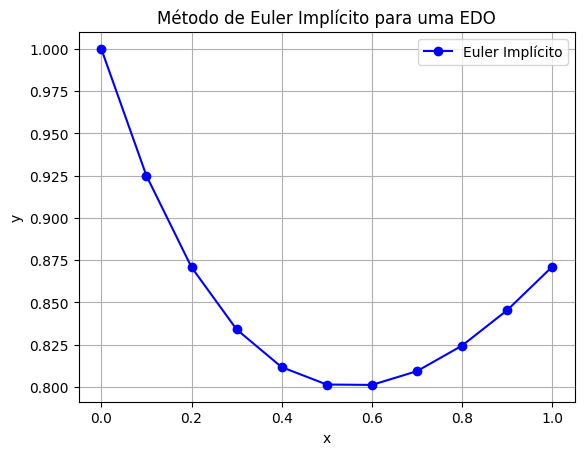

In [11]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

def euler_implicito_edo(f, a, b, y0, h):
    # Número de passos
    N = int((b - a) / h)
    x = np.linspace(a, b, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    
    for i in range(N):
        func = lambda y_next: y_next - y[i] - h * f(x[i+1], y_next)
        y[i+1] = opt.newton(func, y[i])
    
    return x, y

# Definindo a função f(x, y)
def f(x, y):
    return x - 2*y + 1

# Parâmetros de entrada
a = 0
b = 1
y0 = 1
h = 0.1

# Solucionando a EDO
x, y = euler_implicito_edo(f, a, b, y0, h)

# Criando a tabela de resultados
df = pd.DataFrame({'x': x, 'y': y})
print(df)

# Plotando o gráfico
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Euler Implícito')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Euler Implícito para uma EDO')
plt.legend()
plt.grid(True)
plt.show()


#### 2 - Método de Euler implícito para um PVI com um sistema de duas EDO’s

      x        y1        y2
0   0.0  1.000000  0.000000
1   0.1  0.915464 -0.114433
2   0.2  0.842194 -0.248315
3   0.3  0.776210 -0.407421
4   0.4  0.713635 -0.598480
5   0.5  0.650577 -0.829422
6   0.6  0.583010 -1.109654
7   0.7  0.506642 -1.450398
8   0.8  0.416777 -1.865094
9   0.9  0.308157 -2.369887
10  1.0  0.174780 -2.984206


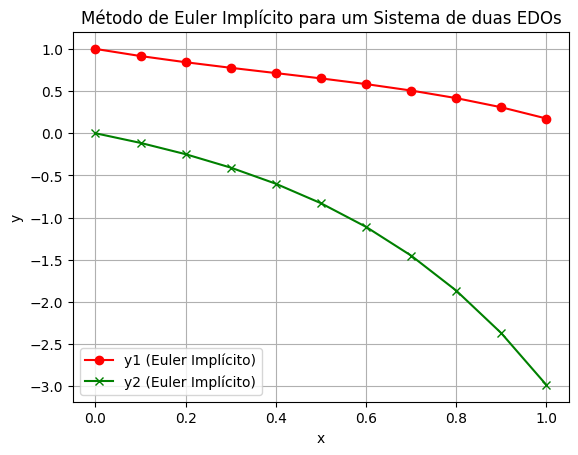

In [13]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

def euler_implicito_sistema(f1, f2, a, b, y10, y20, h):
    # Número de passos
    N = int((b - a) / h)
    x = np.linspace(a, b, N+1)
    y1 = np.zeros(N+1)
    y2 = np.zeros(N+1)
    y1[0] = y10
    y2[0] = y20
    
    for i in range(N):
        func = lambda Y: [
            Y[0] - y1[i] - h * f1(x[i+1], Y[0], Y[1]),
            Y[1] - y2[i] - h * f2(x[i+1], Y[0], Y[1])
        ]
        Y_next = opt.root(func, [y1[i], y2[i]]).x
        y1[i+1] = Y_next[0]
        y2[i+1] = Y_next[1]
    
    return x, y1, y2

# Definindo as funções f1(x, y1, y2) e f2(x, y1, y2)
def f1(x, y1, y2):
    return x - 2 * y1 + y2 + 1

def f2(x, y1, y2):
    return -y1 + 2 * y2

# Parâmetros de entrada
a = 0
b = 1
y10 = 1
y20 = 0
h = 0.1

# Solucionando o sistema de EDOs
x, y1, y2 = euler_implicito_sistema(f1, f2, a, b, y10, y20, h)

# Criando a tabela de resultados
df = pd.DataFrame({'x': x, 'y1': y1, 'y2': y2})
print(df)

# Plotando os gráficos
plt.plot(x, y1, marker='o', linestyle='-', color='r', label='y1 (Euler Implícito)')
plt.plot(x, y2, marker='x', linestyle='-', color='g', label='y2 (Euler Implícito)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Euler Implícito para um Sistema de duas EDOs')
plt.legend()
plt.grid(True)
plt.show()


#### 3 - Método de Runge-Kutta de quarta ordem para um PVI com uma EDO

      x         y
0   0.0  1.000000
1   0.1  0.914050
2   0.2  0.852743
3   0.3  0.811613
4   0.4  0.787001
5   0.5  0.775914
6   0.6  0.775900
7   0.7  0.784952
8   0.8  0.801426
9   0.9  0.823978
10  1.0  0.851505


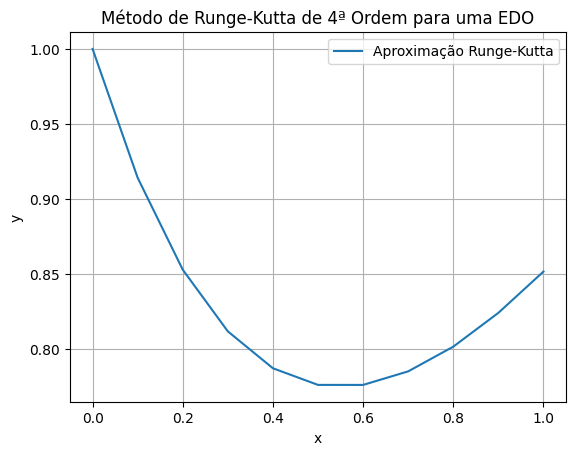

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def runge_kutta_4(f, a, b, y0, m):
    """
    Implementação do método de Runge-Kutta de 4ª ordem para uma EDO.
    
    :param f: Função que representa a EDO dy/dx = f(x, y)
    :param a: Limite inferior do intervalo
    :param b: Limite superior do intervalo
    :param y0: Valor inicial y(a)
    :param m: Número de subintervalos
    :return: Vetores com as abscissas (x) e as soluções (y)
    """
    h = (b - a) / m
    x = np.linspace(a, b, m+1)
    y = np.zeros(m+1)
    y[0] = y0
    
    for i in range(m):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h / 2, y[i] + k1 / 2)
        k3 = h * f(x[i] + h / 2, y[i] + k2 / 2)
        k4 = h * f(x[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return x, y

# Exemplo de uso
def f(x, y):
    return x - 2*y + 1

a = 0
b = 1
y0 = 1
m = 10

x, y = runge_kutta_4(f, a, b, y0, m)

# Imprimindo a tabela de resultados
data = {'x': x, 'y': y}
df = pd.DataFrame(data)
print(df)

# Gráfico
plt.plot(x, y, label='Aproximação Runge-Kutta')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Runge-Kutta de 4ª Ordem para uma EDO')
plt.legend()
plt.grid(True)
plt.show()


#### 4 - Método de Runge-Kutta de quarta ordem para um PVI com um sistema de duas EDO’s

      x         y          z
0   0.0  1.000000   1.000000
1   0.1  0.919913   1.238050
2   0.2  0.879976   1.566505
3   0.3  0.882305   2.012215
4   0.4  0.931465   2.611045
5   0.5  1.034979   3.410717
6   0.6  1.204027   4.474575
7   0.7  1.454428   5.886575
8   0.8  1.807957   7.757886
9   0.9  2.294127  10.235615
10  1.0  2.952558  13.514365


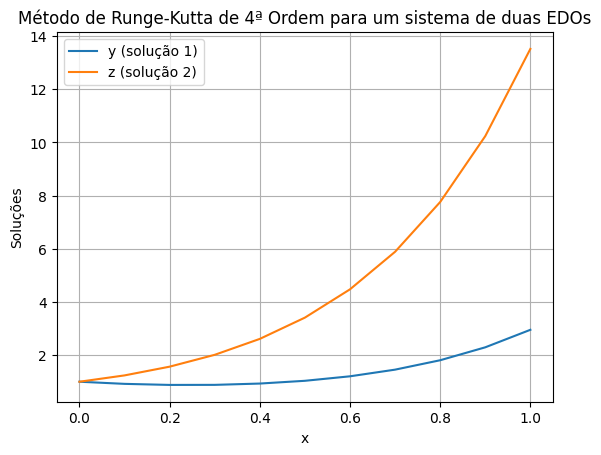

In [7]:
def runge_kutta_4_system(f, g, a, b, y0, z0, m):
    """
    Implementação do método de Runge-Kutta de 4ª ordem para um sistema de duas EDOs.
    
    :param f: Função que representa a primeira EDO dy/dx = f(x, y, z)
    :param g: Função que representa a segunda EDO dz/dx = g(x, y, z)
    :param a: Limite inferior do intervalo
    :param b: Limite superior do intervalo
    :param y0: Valor inicial y(a)
    :param z0: Valor inicial z(a)
    :param m: Número de subintervalos
    :return: Vetores com as abscissas (x) e as soluções (y, z)
    """
    h = (b - a) / m
    x = np.linspace(a, b, m+1)
    y = np.zeros(m+1)
    z = np.zeros(m+1)
    y[0] = y0
    z[0] = z0
    
    for i in range(m):
        k1_y = h * f(x[i], y[i], z[i])
        k1_z = h * g(x[i], y[i], z[i])
        k2_y = h * f(x[i] + h / 2, y[i] + k1_y / 2, z[i] + k1_z / 2)
        k2_z = h * g(x[i] + h / 2, y[i] + k1_y / 2, z[i] + k1_z / 2)
        k3_y = h * f(x[i] + h / 2, y[i] + k2_y / 2, z[i] + k2_z / 2)
        k3_z = h * g(x[i] + h / 2, y[i] + k2_y / 2, z[i] + k2_z / 2)
        k4_y = h * f(x[i] + h, y[i] + k3_y, z[i] + k3_z)
        k4_z = h * g(x[i] + h, y[i] + k3_y, z[i] + k3_z)
        y[i+1] = y[i] + (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6
        z[i+1] = z[i] + (k1_z + 2*k2_z + 2*k3_z + k4_z) / 6
    
    return x, y, z

# Exemplo de uso
def f(x, y, z):
    return -2 * y + z

def g(x, y, z):
    return -y + 3 * z

a = 0
b = 1
y0 = 1
z0 = 1
m = 10

x, y, z = runge_kutta_4_system(f, g, a, b, y0, z0, m)

# Imprimindo a tabela de resultados
data = {'x': x, 'y': y, 'z': z}
df = pd.DataFrame(data)
print(df)

# Gráfico
plt.plot(x, y, label='y (solução 1)')
plt.plot(x, z, label='z (solução 2)')
plt.xlabel('x')
plt.ylabel('Soluções')
plt.title('Método de Runge-Kutta de 4ª Ordem para um sistema de duas EDOs')
plt.legend()
plt.grid(True)
plt.show()
